## Is a comfortable seat and a good movie enough to satisfy an airline customer?

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data

df = pd.read_excel("satisfaction.xlsx")
df.head()


,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
## Check the shape 
df.shape

(129880, 24)

In [4]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')
df.shape

(129880, 24)

In [5]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
satisfaction_v2                      129880 non-null object
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64

In [6]:
## Find how many unique values
df.nunique()

id                                   129880
satisfaction_v2                           2
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        5398
Seat comfort                              6
Departure/Arrival time convenient         6
Food and drink                            6
Gate location                             6
Inflight wifi service                     6
Inflight entertainment                    6
Online support                            6
Ease of Online booking                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Cleanliness                               6
Online boarding                           6
Departure Delay in Minutes      

In [7]:
## Find the unique values in a single column
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
## Find the unique values in a single column
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [9]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [10]:
df["satisfaction_v2"].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [11]:
df["Class"].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

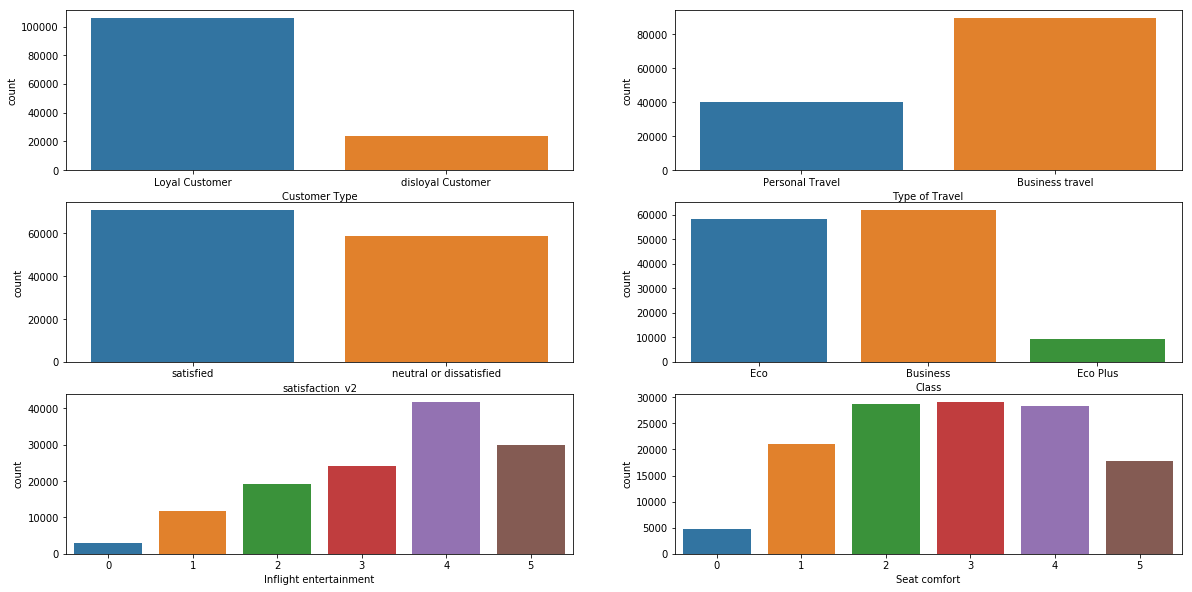

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
sns.countplot(df['Customer Type'], ax=ax[0,0])
sns.countplot(df['Type of Travel'], ax=ax[0,1])
sns.countplot(df['satisfaction_v2'], ax=ax[1,0])
sns.countplot(df['Class'], ax=ax[1,1])
sns.countplot(df['Inflight entertainment'], ax=ax[2,0])
sns.countplot(df['Seat comfort'], ax=ax[2,1])

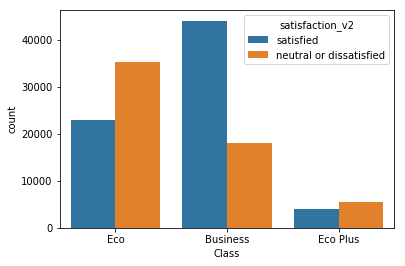

In [13]:
sns.countplot(x="Class", hue="satisfaction_v2", data=df)

In [14]:
#Pre-Process Data

df['Gender'] = np.where(df['Gender']=='Male',1,0)
df['Customer Type'] = np.where(df['Customer Type']=='Loyal Customer',1,0)
df['satisfaction_v2'] = np.where(df['satisfaction_v2']=='satisfied',1,0)

ToT = pd.get_dummies(df["Type of Travel"], prefix='Type of Travel: ')
Cls = pd.get_dummies(df.Class, prefix='Class : ')

df = pd.concat([df, ToT, Cls],axis=1)

df.drop(['Type of Travel', 'Class','id'], axis=1, inplace=True)

In [15]:
## Check the stats
df.describe()

,satisfaction_v2,Gender,Customer Type,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel: _Business travel,Type of Travel: _Personal Travel,Class : _Business,Class : _Eco,Class : _Eco Plus
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.547328,0.492616,0.816908,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,...,3.340807,3.705759,3.352587,14.713713,15.091129,0.690584,0.309416,0.478596,0.448945,0.072459
std,0.497757,0.499947,0.386743,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,...,1.260582,1.151774,1.298715,38.071126,38.465650,0.462255,0.462255,0.499544,0.497388,0.259248
min,0.000000,0.000000,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
## Find how many null values
df.isnull().sum()

satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Type of Travel: _Business travel       0
Type of Travel: _Personal Travel       0
Class : _Business                      0
Class : _Eco    

In [17]:
df.dropna(inplace=True)
df.shape
df.isnull().sum()

satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Type of Travel: _Business travel     0
Type of Travel: _Personal Travel     0
Class : _Business                    0
Class : _Eco                         0
Class : _Eco Plus        

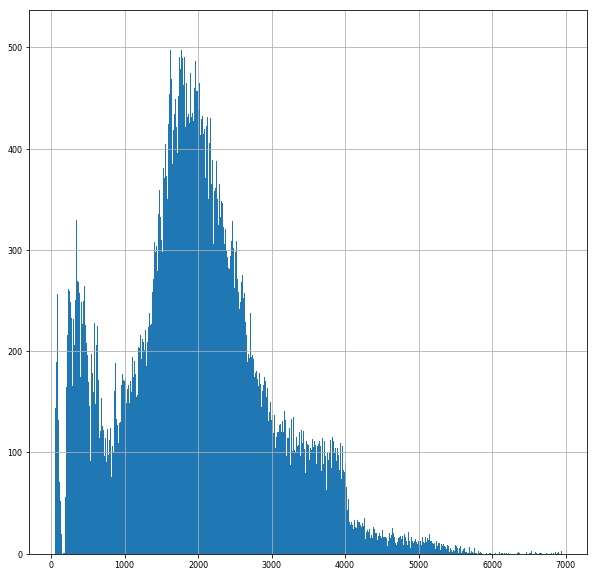

In [18]:
## Histogram for flight distance
df["Flight Distance"].hist(figsize=(10, 10), bins=1000, xlabelsize=8, ylabelsize=8)

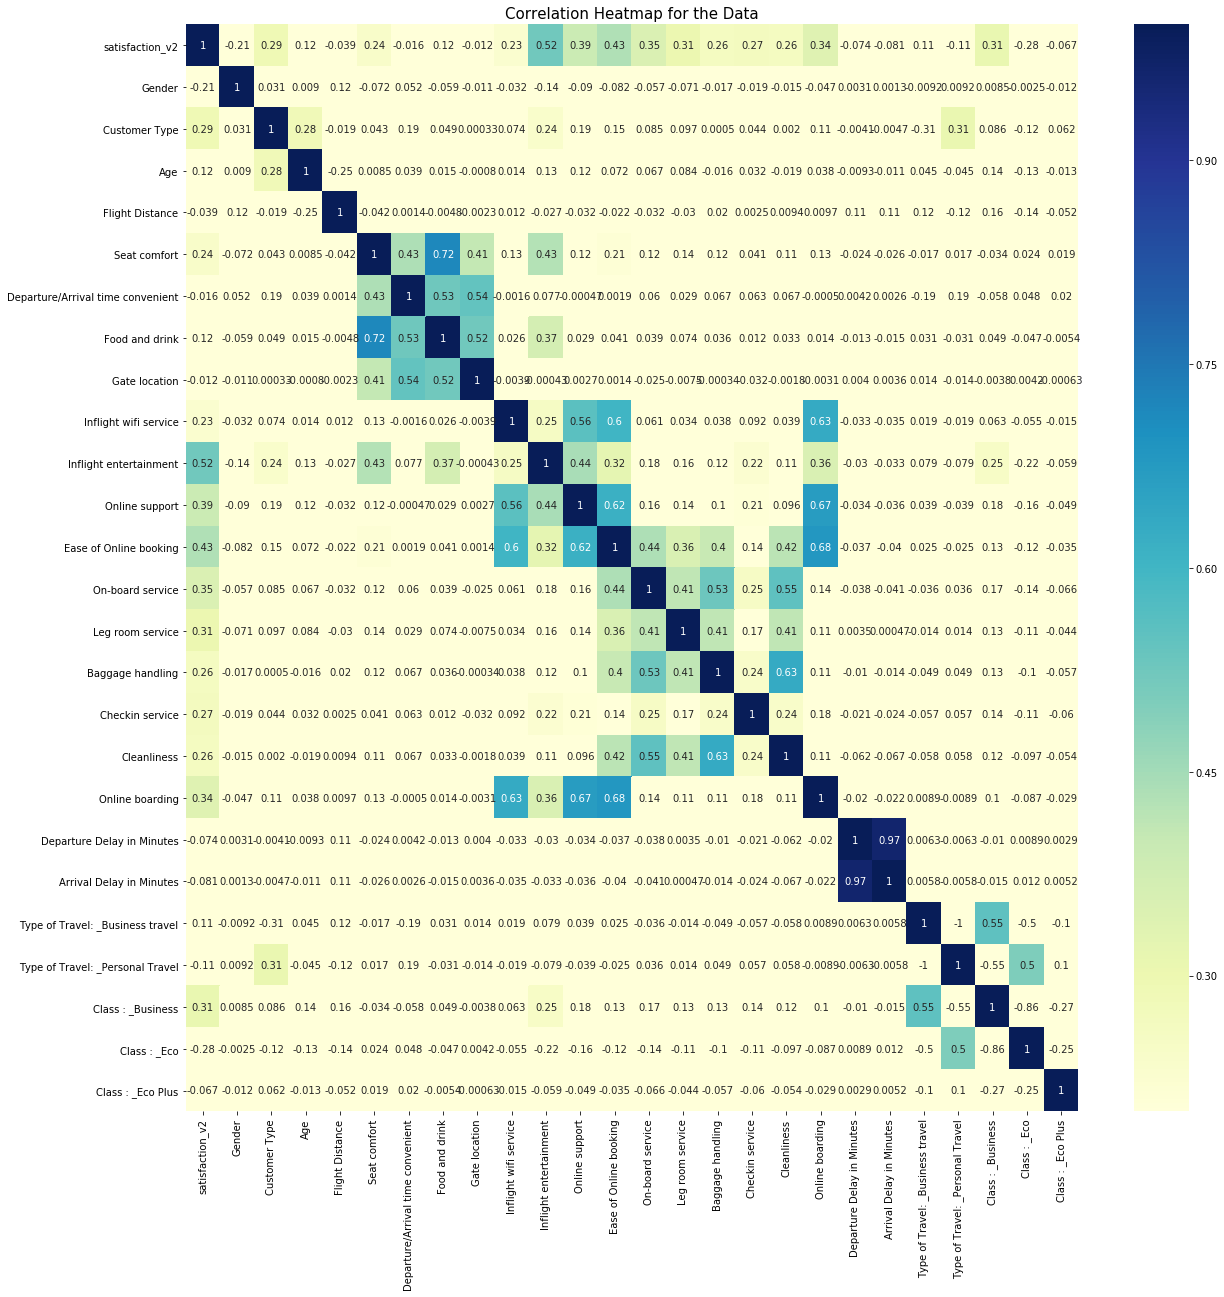

In [19]:
## Heat Map of correlations

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, ax=ax, vmin=.2)
plt.title('Correlation Heatmap for the Data', fontsize = 15)
plt.show()

In [20]:
#Isolate the correlation between satisfaction and other variables

correlation = df.drop('satisfaction_v2', axis=1).apply(lambda x: x.corr(df.satisfaction_v2))
print(correlation.sort_values(ascending=False))

Inflight entertainment               0.523364
Ease of Online booking               0.432017
Online support                       0.389890
On-board service                     0.352283
Online boarding                      0.338118
Class : _Business                    0.311935
Leg room service                     0.305115
Customer Type                        0.292563
Checkin service                      0.266089
Baggage handling                     0.260398
Cleanliness                          0.259504
Seat comfort                         0.242371
Inflight wifi service                0.227010
Food and drink                       0.120568
Age                                  0.117913
Type of Travel: _Business travel     0.108910
Gate location                       -0.012272
Departure/Arrival time convenient   -0.015624
Flight Distance                     -0.039133
Class : _Eco Plus                   -0.067498
Departure Delay in Minutes          -0.073960
Arrival Delay in Minutes          

In [21]:
df_Non_Business = df.ix[(df['Class : _Business'] !=1) & (df['Class : _Eco Plus'] !=1),:]
df_Non_Business.shape


(58117, 26)

In [22]:
#Isolate the correlation between satisfaction and other variables for non-business or plus customers

correlation = df_Non_Business.drop('satisfaction_v2', axis=1).apply(lambda x: x.corr(df_Non_Business.satisfaction_v2))
print(correlation.sort_values(ascending=False))

Inflight entertainment               0.465314
Seat comfort                         0.353571
Ease of Online booking               0.327750
Online support                       0.293221
Customer Type                        0.282450
Online boarding                      0.247906
On-board service                     0.229045
Inflight wifi service                0.199782
Leg room service                     0.175809
Food and drink                       0.174584
Type of Travel: _Personal Travel     0.169799
Checkin service                      0.154959
Cleanliness                          0.120913
Baggage handling                     0.120109
Age                                  0.056155
Departure/Arrival time convenient   -0.008128
Gate location                       -0.018903
Departure Delay in Minutes          -0.085449
Arrival Delay in Minutes            -0.089242
Type of Travel: _Business travel    -0.169799
Flight Distance                     -0.205771
Gender                            

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_Non_Business, test_size=0.2)

y_train = train['satisfaction_v2']
y_test = test['satisfaction_v2']

X_train = train.drop(['satisfaction_v2'], axis=1)
X_test = test.drop(['satisfaction_v2'], axis=1)



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model


def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv


# Random Forest Classifier ----------------------------------------------------------------

train_pred_log, acc_log, acc_cv_rfor = fit_ml_algo(RandomForestClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Logistic Regression ---------------------------------------------------------------------

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# K-Nearest Neighbours --------------------------------------------------------------------

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Gaussian Naive Bayes --------------------------------------------------------------------

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

# Linear SVC --------------------------------------------------------------------------------

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)

# Stochastic Gradient Descent ----------------------------------------------------------------

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)

# Decision Tree Classifier ------------------------------------------------------------------

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

# Gradient Boosting Trees -------------------------------------------------------------------

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)

Text(0.5, 0, 'Importance')

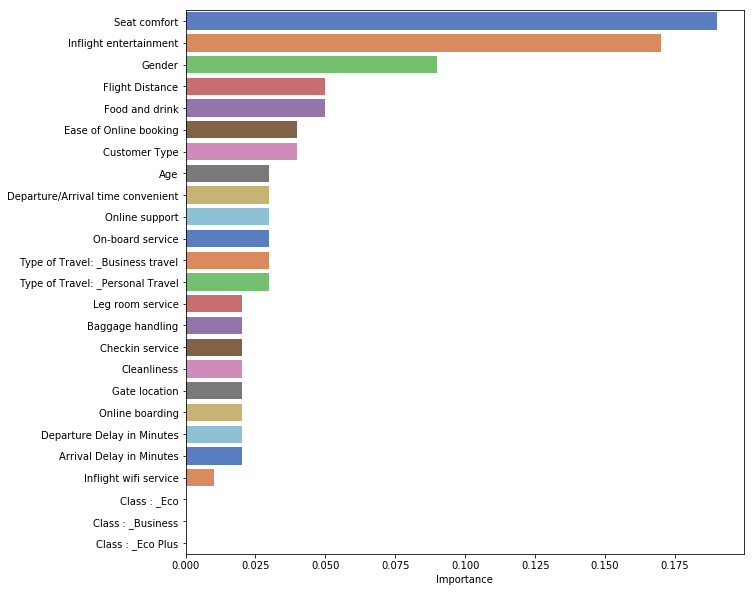

In [25]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

f_im = clf.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')

In [26]:
models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_rfor,
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
6,Decision Tree,100.00
0,RandomForestClassifier,93.29
7,Gradient Boosting Trees,91.66
2,Logistic Regression,83.70
3,Naive Bayes,79.72
1,KNN,79.39
4,Stochastic Gradient Decent,59.11
5,Linear SVC,39.64


In [27]:
# Cross-Validation Accuracy Scores ------------------------------------------------------------------

cv_models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_rfor,
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
0,RandomForestClassifier,93.29
6,Decision Tree,91.65
7,Gradient Boosting Trees,91.60
2,Logistic Regression,83.67
3,Naive Bayes,79.70
1,KNN,69.00
5,Linear SVC,68.67
4,Stochastic Gradient Decent,59.75


In [28]:
#Choose model

X_train.rename(columns={'Seat comfort': 'Seat_Comfort','Inflight entertainment': 'Inflight_Entertainment'}, inplace=True)


X_train = np.array(X_train[['Seat_Comfort', 'Inflight_Entertainment']])

y_train = np.array(y_train)

rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)


print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2))



The accuracy score is:  83.41


In [35]:
## function to predict churn

def satisfied_customer(Seat_Comfort, Inflight_Entertainment):
    if(model.predict([[Seat_Comfort, Inflight_Entertainment]]))==0:
        print('Not a happy customer')
    else:
        print('Happy customer')

#Predict test
satisfied_customer(4, 5)
print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2),"%")

Happy customer
The accuracy score is:  83.41 %
